# Explore here

In [1]:
# Your code here
import pandas as pd

In [3]:
# PASO 1
# Cargar conjuntos de datos y definir df

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#Almacenar los datos en crudo en la carpeta 

df.to_csv('../data/raw/df.csv')

In [6]:
# Paso 2 : EDA

# Obtener las dimensiones

df.shape

(48895, 16)

In [23]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(7), object(

In [ ]:
# Podemos ver que tenemos 48895 entradas (filas) y 16 columnas.
# Hay algunas columnas que le faltan datos a las columnas 1,3,12,13.
# También nos indica el tipo de dato que es (int64, object, float64)

In [22]:
# Revisar si hay duplicados

df.duplicated().sum()

# No hay columnas duplicadas
# Ahora hay que revisar si los id están duplicados

print(df['id'].duplicated().sum())

#No hay duplicados de Id, son puros registros únicos

0


In [21]:
# Eliminar información irrelevante
# Pregunta de rigor = ¿son todas las características imprescindibles para realizar una predicción?
# last review no es relevante, ya que es ocasional no nos ayuda a la predicción
# reviews_per_month: tiene más de 10.000 null y tengo más columnas para predecir
# host_name: tengo el host_id
# name: no me influye en predecir el nombre

columnas_eliminar=['last_review','reviews_per_month','id','host_name','name']
df.drop(columnas_eliminar,axis=1,inplace=True)
df.info()

KeyError: "['last_review', 'reviews_per_month', 'host_name', 'name'] not found in axis"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(7), object(

In [25]:
df.drop(['id'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


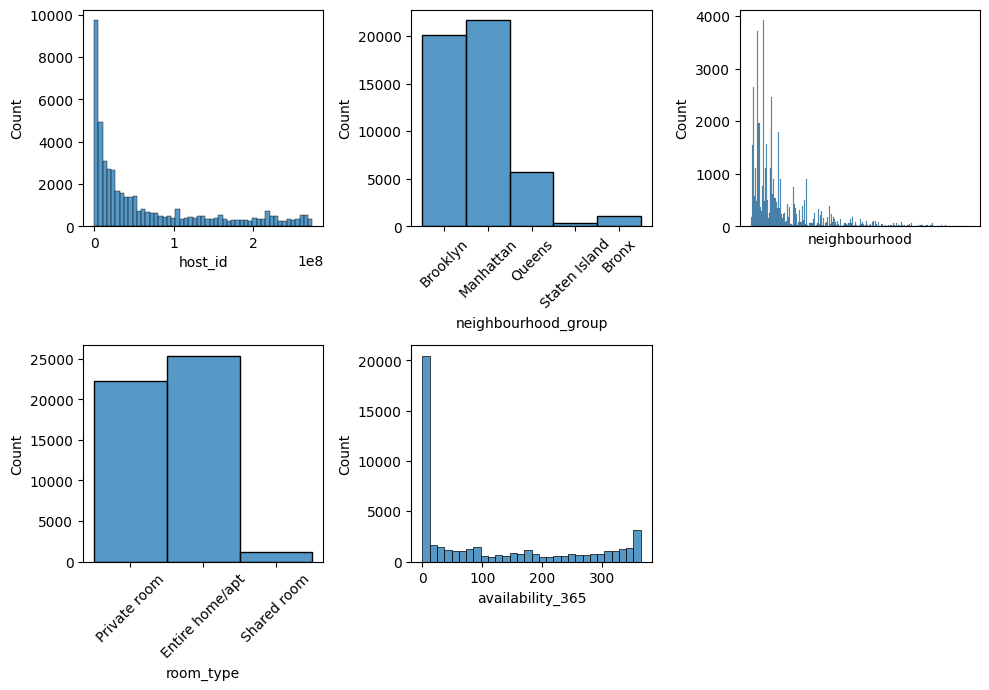

In [35]:
# Analisis univarientes
# Analisis Variables categoricas. Una variable categórica es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos
# Hay que usar Histograma e identificar cuales son categoricas
# host_id al ser un número no lo puedo ordenar. Es ideferente si un host_id va primero que otro.
# Categórica : host_id, neighbourhood_group, neighbourhood, room_type, availability_365
# Numérica: latitude, longitude, price, calculated_host_listings_count, availability_365, minimum_nights
# Duda Categorica/numerica = availability_365, minimum_nights

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax= axis[0,0], data = df, x='host_id')
sns.histplot(ax= axis[0,1], data = df, x='neighbourhood_group')
sns.histplot(ax= axis[0,2], data = df, x='neighbourhood').set_xticks([])
sns.histplot(ax= axis[1,0], data = df, x='room_type')
sns.histplot(ax= axis[1,1], data = df, x='availability_365')
fig.delaxes(axis[1,2])

for i, label in enumerate(axis[0, 2].get_xticklabels()):
    if i % 10 != 0:  # Mostrar solo cada décima etiqueta
        label.set_visible(False)


axis[0, 1].tick_params(axis='x', rotation=45)
axis[1, 0].tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()

plt.show()

